# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/YBIGTA/0109 eda/Data/airbnb_listings.csv', index_col=0)

<ipython-input-7-103480a6dba1>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/YBIGTA/0109 eda/Data/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [9]:
# Q1
# display.max_columns 옵션 설정
pd.set_option('display.max_columns', None)
display(df.head(5))

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [12]:
# Q2
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [21]:
#Q2
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_ratio = missing / len(df) * 100
missing_df = pd.DataFrame({'missing_num': missing, 'missing_%': missing_ratio})
missing_df = missing_df.sort_values(by='missing_num', ascending=False)
missing_df['missing_%'] = missing_df['missing_%'].round(1)
display(missing_df)

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

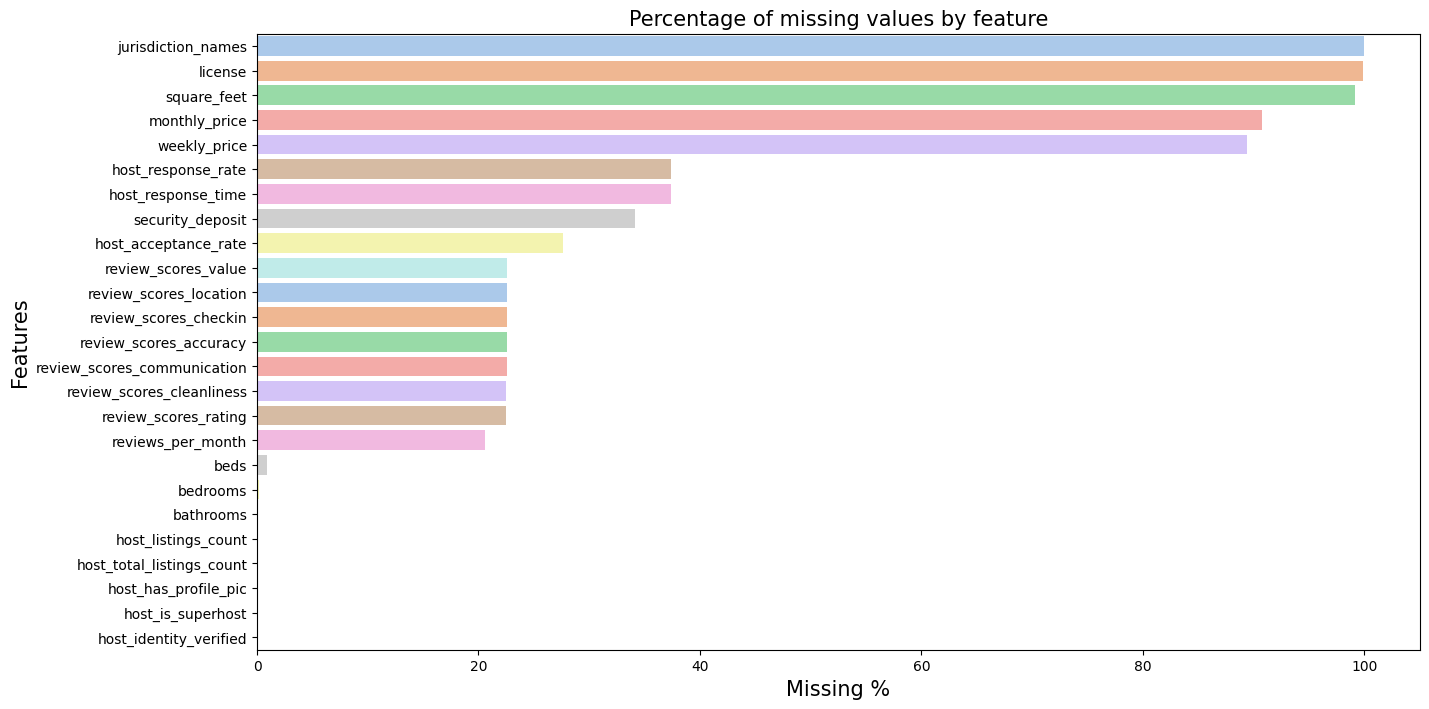

In [22]:
# Q3
import matplotlib.pyplot as plt
import seaborn as sns

missing_df = missing_df.reset_index()
missing_df = missing_df.rename(columns = {'index': 'Features'})

plt.figure(figsize=(15, 8))
sns.barplot(x='missing_%', y='Features', data = missing_df, palette = 'pastel')
plt.title('Percentage of missing values by feature', fontsize=15)
plt.xlabel('Missing %', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [23]:
# Q4
missing_beds = df[df['beds'].isnull()]
missing_beds.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [24]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [25]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

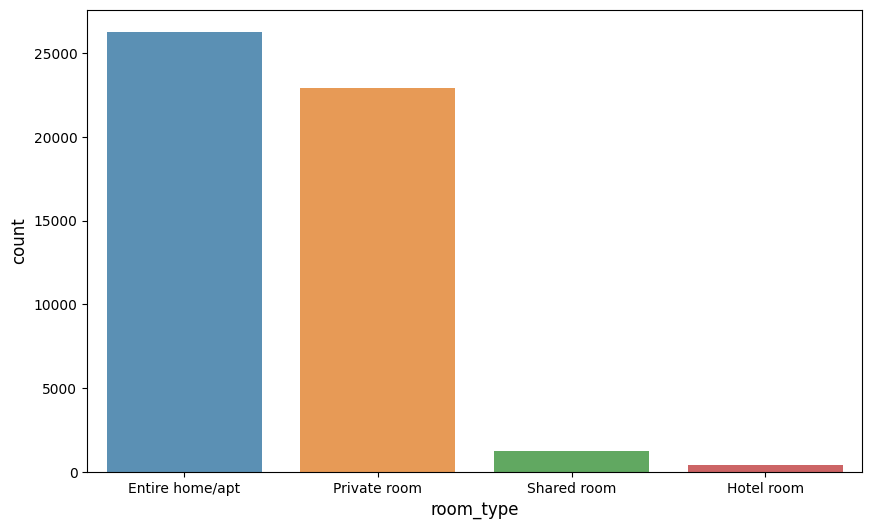

In [28]:
# Q5
import matplotlib.pyplot as plt
import seaborn as sns
room_counts = df['room_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=room_counts.index, y=room_counts.values, alpha=0.8)

plt.ylabel('count', fontsize=12)
plt.xlabel('room_type', fontsize=12)
plt.show()


- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

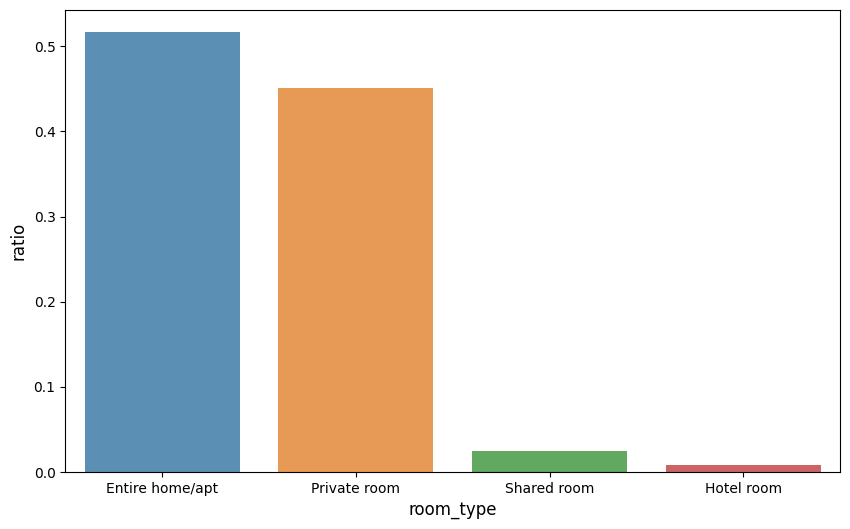

In [31]:
# Q6
import matplotlib.pyplot as plt
import seaborn as sns
room_counts = df['room_type'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=room_counts.index, y=room_counts.values, alpha=0.8)

plt.ylabel('ratio', fontsize=12)
plt.xlabel('room_type', fontsize=12)
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

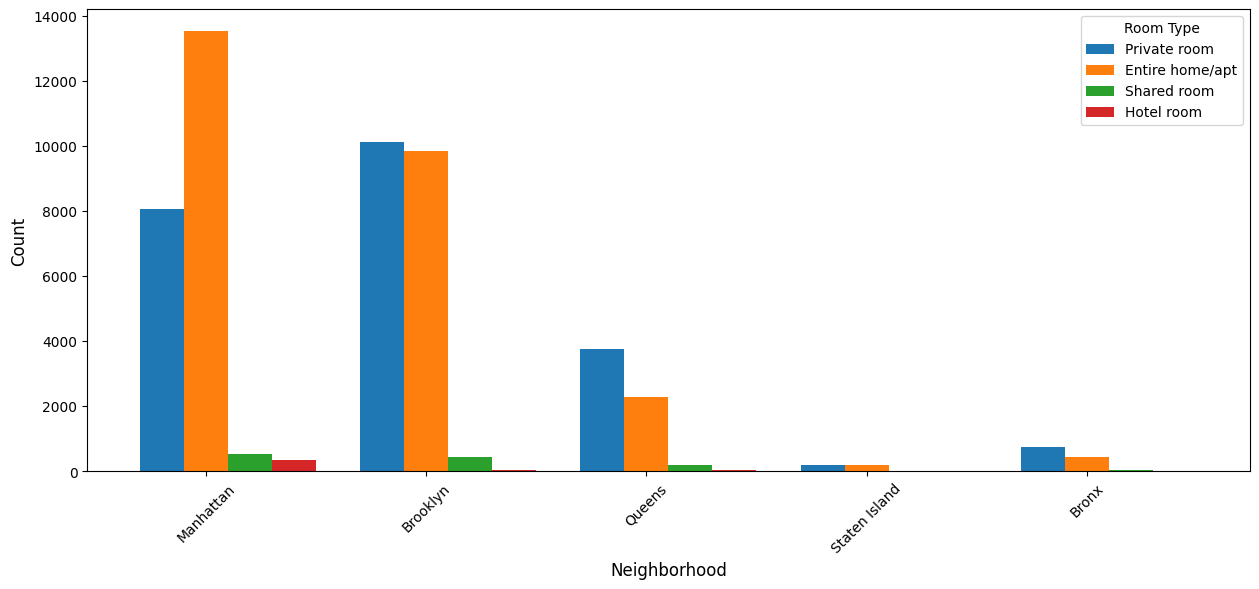

In [44]:
# Q7
import matplotlib.pyplot as plt
import numpy as np

count_df = df.groupby(['neighborhood', 'room_type']).size().reset_index(name='counts')

neighbourhoods = df['neighborhood'].unique()
room_types = df['room_type'].unique()

plt.figure(figsize=(15, 6))
bar_width = 0.2

for i, room_type in enumerate(room_types):
    counts = []
    for neighbourhood in neighbourhoods:
        try:
            count = count_df[(count_df['neighborhood'] == neighbourhood) & (count_df['room_type'] == room_type)]['counts'].values[0]
        except:
            count = 0
        counts.append(count)
    plt.bar(np.arange(len(neighbourhoods)) + i*bar_width,
            counts,
            label=room_type,
            width=bar_width)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Neighborhood', fontsize=12)
plt.xticks(np.arange(len(neighbourhoods)) + bar_width, neighbourhoods, rotation=45)
plt.legend(title='Room Type')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<ipython-input-51-f679dce44c80>:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="neighborhood", y="price", data=df, jitter=True, palette=palette)


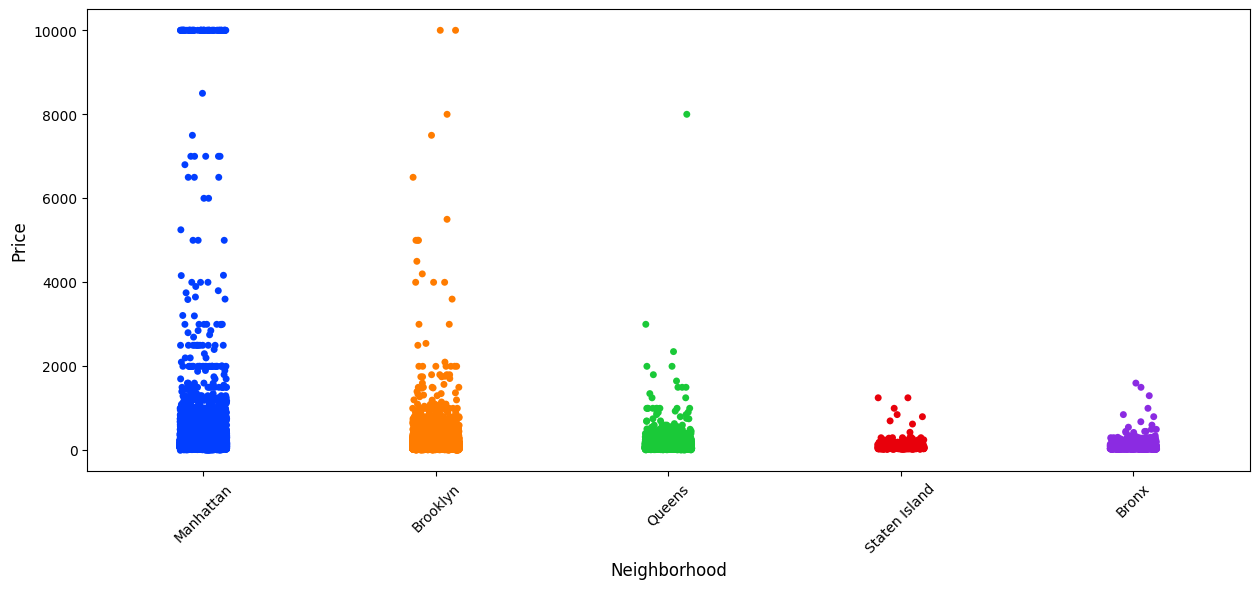

In [51]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

palette = sns.color_palette("bright", len(df['neighborhood'].unique()))

sns.stripplot(x="neighborhood", y="price", data=df, jitter=True, palette=palette)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Neighborhood', fontsize=12)
plt.xticks(rotation=45)
plt.show()


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [53]:
# Q9

맨하튼과 브루클린에서는 방 가격의 분산이 크다 이는 두 지역에서 제공되는 숙소가 다양한 가격대가 존재하고 에어비앤비 호스트들에게 다양한 가격대의 숙소를 제공할 수 있는 인프라가 있다는것을 알 수 있다, 반면에, 퀸즈, 스테이튼 아일랜드, 브루녹스에서는 방 가격이 상대적으로 일정하다는 것은 이 지역의 숙박 시장이 비교적 안정적이라는 것을 알 수 있다.

또한,맨하튼에서는 'Entire Home/apt'와 'Private room'이 주로 제공되는 것을 알 수 있었다. 이는 맨하튼이 관광객들에게 인기가 있으며, 개인적인 공간을 선호하는 손님들에게 인기가 있을 수 있음을 나타낸다

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

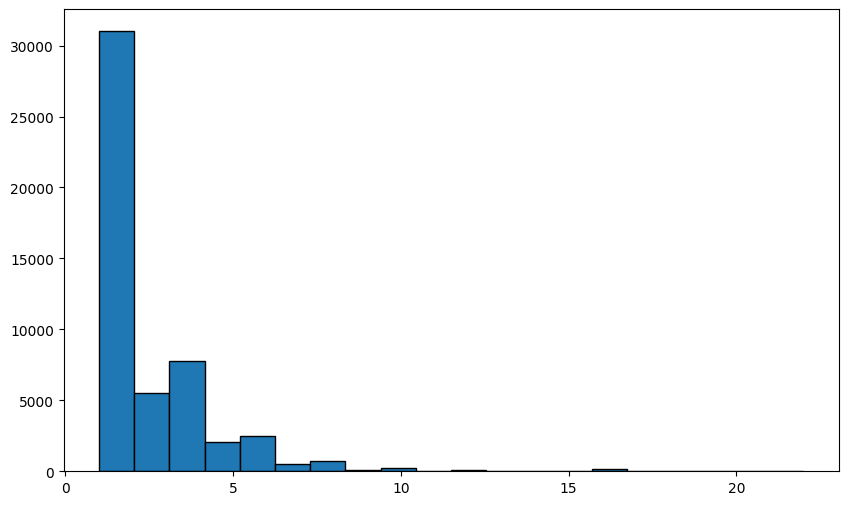

In [55]:
# Q10
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['accommodates'], bins=20, edgecolor='black')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

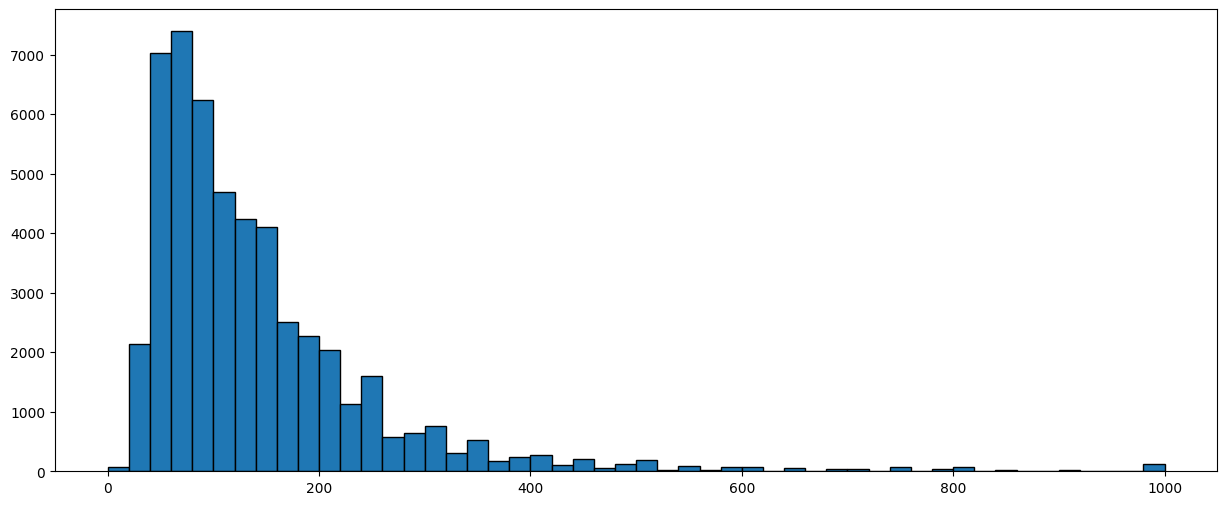

In [59]:
# Q11
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.hist(df['price'], bins=50, range=(0, 1000), edgecolor='black')
plt.show()


* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [61]:
df = pd.read_csv('/content/drive/MyDrive/YBIGTA/0109 eda/Data/airbnb_listings.csv', index_col=0)

<ipython-input-61-103480a6dba1>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/YBIGTA/0109 eda/Data/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [62]:
#Q12
# 결측치 비율 계산
missing_ratio = df.isnull().mean()

# 결측치가 25% 이상인 column drop
df = df.loc[:, missing_ratio < 0.25]

# 결측치가 10% 이상 25% 미만인 경우 row drop
cols_10_25 = missing_ratio[(missing_ratio >= 0.10) & (missing_ratio < 0.25)].index
df = df.dropna(subset=cols_10_25)

# 결측치가 10% 미만인 경우 중앙값으로 대체
cols_less_10 = missing_ratio[missing_ratio < 0.10].index
df[cols_less_10] = df[cols_less_10].fillna(df[cols_less_10].median())

<ipython-input-62-850e89fad171>:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[cols_less_10] = df[cols_less_10].fillna(df[cols_less_10].median())


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [63]:
#Q13-1)
df['price_per_person'] = df['price'] / df['accommodates']
#이유: 'accommodates'와 'price' 간의 관계를 나타내는 새로운 feature를 만들어서, 방의 가격이 수용 가능 인원에 직접적으로 어떠한 영향을 주는지 분석, 통상적으로 에어비앤비에 인원수는 한정적인데 가격은 말도안되는 특정 '허수' 호스트 선별 가능

In [64]:
#Q13-2)
df = pd.get_dummies(df, columns=['room_type'])
#이유: 'room_type'은 범주형 변수이기 때문에, 모델이 이해할 수 있는 형태로 변환. 따라서 One-Hot Encoding을 사용하여 변수를 모델이 이해 할 수 있는 형태로 변환.

In [65]:
#Q13-3)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# 'reviews_per_month'는 결측치가 많은 변수. 이에 대한 결측치를 0으로 대체하여, 리뷰가 없는 숙소를 나타내는 새로운 정보를 암시적으로 포함시킬 수 있음, 리뷰의 수가 직접적으로 가격에 얼마나 유의미한 영향을 주는지 파악 가능

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
